In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv', sep = ',')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.set_index('PassengerId',inplace=True,drop=True)

In [5]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [7]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
train.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [9]:
def parse_model_0(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target

In [10]:
X, y = parse_model_0(train.copy())

In [11]:
X.head()

,Fare,SibSp,Parch
PassengerId,,,
1,7.2500,1,0
2,71.2833,1,0
3,7.9250,0,0
4,53.1000,1,0
5,8.0500,0,0


In [12]:
from sklearn.cross_validation import cross_val_score
# from statistics import mean
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y)
    return np.mean(xval)

/home/fabier/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
compute_score(lr, X, y)

0.67340067340067344

In [14]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

In [15]:
train.max()

Survived      1.0000
Pclass        3.0000
Age          80.0000
SibSp         8.0000
Parch         6.0000
Fare        512.3292
dtype: float64

In [16]:
train.min()

Survived    0.00
Pclass      1.00
Age         0.42
SibSp       0.00
Parch       0.00
Fare        0.00
dtype: float64

In [17]:
train.mean()

Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [18]:
train.std()

Survived     0.486592
Pclass       0.836071
Age         14.526497
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64

In [97]:
def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    # print(x1)
    plt.hist([x1, x2], label=['Victime','Survivant'], bins=bins)#, color = ['', 'b'])
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()

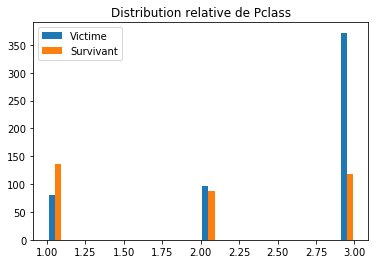

In [98]:
plot_hist('Pclass')

In [21]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

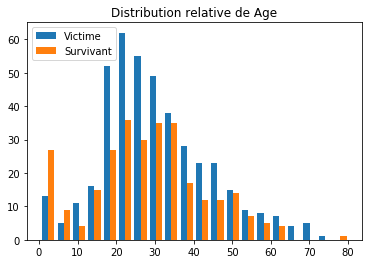

In [22]:
plot_hist('Age')

In [23]:
def parse_model_1(X):
    target = X.Survived
    class_dummies = pd.get_dummies(X['Pclass'], prefix = 'split')
    X = X.join(class_dummies)
    to_del = ['Name','Age','Cabin','Embarked','Survived','Sex','Ticket']
    for col in to_del:
        del X[col]
    return X, target

In [24]:
X, y = parse_model_1(train.copy())
lr = LogisticRegression()
compute_score(lr, X, y)

0.6980920314253648

In [55]:
lr = LogisticRegression()
lr.fit(X, y)
lr.coef_[0]

array([-0.41150191, -0.22341731,  0.00496704,  0.79141462,  0.06775574,
       -0.83333893,  1.40881919, -1.38298775,  2.17560886])

In [94]:
def parse_model_2(X):
    target = X.Survived
    to_dummy = ['Pclass', 'Sex']
    for dum in to_dummy:
        split_temp = pd.get_dummies(X[dum], prefix = 'split_'+dum)
        for col in split_temp:
            X[col] = split_temp[col]
        del X[dum]
    X['Age'] = X.Age.fillna(X.Age.median())
    X['is_child'] = X.Age <= 8
    # X['is_adult'] = train.Age.fillna(train.Age.median()) >= 18
    # X['is_under35'] = train.Age.fillna(train.Age.median()) <= 35
    # X['is_between_18and35'] = np.where((train.Age > 18) & (train.Age < 35), True, False)
    to_del = ['Name','Age','Cabin','Embarked','Survived','Ticket']
    for col in to_del: del X[col]
    return X, target

In [95]:
X, y = parse_model_2(train.copy())
r = LogisticRegression()
compute_score(lr, X, y)

0.80471380471380483

In [96]:
lr = LogisticRegression()
lr.fit(X, y)
lr.coef_[0]

array([-0.41150191, -0.22341731,  0.00496704,  0.79141462,  0.06775574,
       -0.83333893,  1.40881919, -1.38298775,  2.17560886])